In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

seed = 3

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Decide on columns and run pca, save transformed data

In [5]:
df = pd.read_csv('../datasets/preprocessing/scaled_2000_to_2020.csv', index_col=0)
df.shape

(6541, 71)

In [6]:
sorted(df.columns)

['age',
 'and1s_per_min',
 'ast_pct',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_heave',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_heave',
 'fg3a_per_poss',
 'fg_dunk_per_min',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fg_per_poss',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'obpm',
 'off_rtg',
 'orb_pct',
 'own_shots_blk_per_min',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_c',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'pct_pf',
 'pct_pg',
 'pct_sf',
 'pct_sg',
 'per',
 'pf_per_poss',
 'plus_minus_net',
 'plus_minus_on',
 'pts_per_poss',
 'stl_pct',
 'tov_bad_pass_per_min',
 'tov_lost_ball_per_min',
 'tov_pct',

In [8]:
drop_cols = ['age',
             'pct_c',
             'pct_pf',
             'pct_pg',
             'pct_sf',
             'pct_sg',
             'year',
             'fg3_heave',
             'fg3a_heave',
             'fg_dunk_per_min',
             'fg_per_poss',  # already have fg2 per poss and fg3 per poss
             'fg_pct',  # already have %s for fg 2s and 3s as well as all the location %s
             
             ### More drop cols for SLIM version
             'fg_pct_00_03',
             'fg_pct_03_10',
             'fg_pct_10_16',
             'fg_pct_16_xx',
             
             'fouls_offensive_per_min',
             'fouls_shooting_per_min',
             'own_shots_blk_per_min',
             'tov_bad_pass_per_min',
             'tov_lost_ball_per_min',
             
             'plus_minus_on',
             'plus_minus_net'
             
             
#              ## Redundant given attempts and percent?
#              'ft_per_poss',
#              'fg2_per_poss',
#              'fg3_per_poss'
             
             
            ]

df = df.drop(drop_cols, axis=1)

In [9]:
sorted(df.columns)

['and1s_per_min',
 'ast_pct',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_per_poss',
 'fg_pct_corner3',
 'fga_per_poss',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'obpm',
 'off_rtg',
 'orb_pct',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'per',
 'pf_per_poss',
 'pts_per_poss',
 'stl_pct',
 'tov_pct',
 'trb_pct',
 'ts_pct',
 'usg_pct',
 'vorp',
 'weight']

In [10]:
# df.to_csv('../bballref_data/pre_pca_2000_to_2020_slim.csv')
df.shape

(6541, 48)

## Run pca, see explained variance wrt # principal components

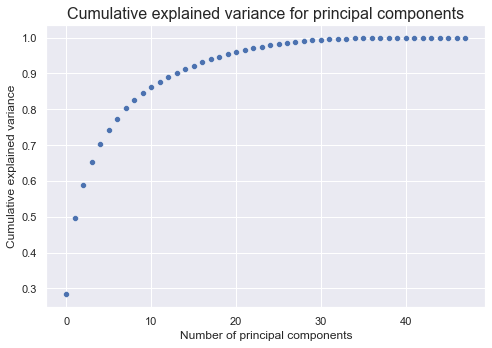

In [19]:
df = pd.read_csv('../datasets/pre_pca/pre_pca_slim_2000_to_2020.csv', index_col=0)
pca = PCA(random_state=seed)
pca.fit(df)

cumulative_exp_var = pca.explained_variance_ratio_.cumsum()


fig, ax = plt.subplots(figsize=(7,5))

s = sns.scatterplot(data=cumulative_exp_var, ax=ax)
ax.set_title('Cumulative explained variance for principal components', fontsize=16)
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Cumulative explained variance')
plt.tight_layout()

In [21]:
## 2020-11-21 getting pca plot for writeup
fig.savefig('../plots/pca_explained_variance.png')

In [18]:
for i, exp_var in enumerate(cumulative_exp_var):
    print(i, ': ', exp_var)

0 :  0.283426253367465
1 :  0.4971107815799372
2 :  0.5877343699792168
3 :  0.651989215852489
4 :  0.703787870321947
5 :  0.7409900092233728
6 :  0.7729462495144562
7 :  0.8025154910090384
8 :  0.8265864934304378
9 :  0.8447273735757809
10 :  0.8608885500895874
11 :  0.8763485808487906
12 :  0.8904936783258036
13 :  0.902145890153413
14 :  0.9122070440182344
15 :  0.9216325790571582
16 :  0.9309346556203009
17 :  0.9390921938405633
18 :  0.9468499580720094
19 :  0.9542408840998409
20 :  0.9597999927663546
21 :  0.9652884370408706
22 :  0.9704752791886438
23 :  0.9750939084339543
24 :  0.9793779409849401
25 :  0.9831565561858244
26 :  0.9861513848242013
27 :  0.9886490312449159
28 :  0.9906344998567064
29 :  0.9924479954466457
30 :  0.9941275232780838
31 :  0.9952545122935417
32 :  0.9961771560961817
33 :  0.9969536749126342
34 :  0.9976768870726053
35 :  0.9983425099793908
36 :  0.9988781118884129
37 :  0.9992828349861391
38 :  0.9995362034172212
39 :  0.999691436465798
40 :  0.9997992

### Thresholds
- 90% : 19
- 95% : 25
- 99% : 37
- 99.9% : 48

## Run pca with 99% var

In [19]:
pca = PCA(0.99, random_state=seed)
df = pd.read_csv('../bballref_data/pre_pca_2000_to_2020_slim.csv', index_col=0)
pca_data = pca.fit_transform(df)
print(pca.n_components_)
df_pca = pd.DataFrame(pca_data, index=df.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca.to_csv('../bballref_data/pca99_slim_2000_to_2020.csv')

29
